In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)


In [3]:

# horizontal, vertical, and diagonal lines
rows, cols = image.shape
center_x, center_y = rows // 2, cols // 2


In [4]:

# Horizontal Line Filter
horizontal_filter = np.ones_like(image)
horizontal_filter[center_x - 2:center_x + 3, :] = 0



In [5]:
# Vertical Line Filter
vertical_filter = np.ones_like(image)
vertical_filter[:, center_y - 2:center_y + 3] = 0



In [6]:
# Diagonal Line Filter
diagonal_filter = np.ones_like(image)
np.fill_diagonal(diagonal_filter, 0)


In [7]:

# filters on frequency domain
result_horizontal = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * horizontal_filter)))
result_vertical = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * vertical_filter)))
result_diagonal = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * diagonal_filter)))



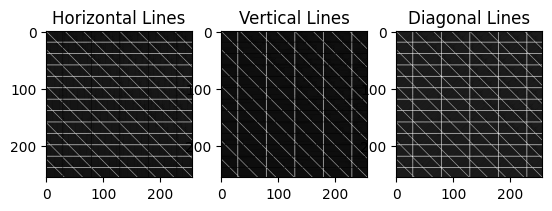

In [8]:
# Displaying images
plt.subplot(131), plt.imshow(result_horizontal, cmap='gray')
plt.title('Horizontal Lines')
plt.subplot(132), plt.imshow(result_vertical, cmap='gray')
plt.title('Vertical Lines')
plt.subplot(133), plt.imshow(result_diagonal, cmap='gray')
plt.title('Diagonal Lines')

plt.show()

# New Section

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

rows, cols = image.shape
new_rows = cv2.getOptimalDFTSize(rows)
new_cols = cv2.getOptimalDFTSize(cols)
padded_image = cv2.copyMakeBorder(image, 0, new_rows - rows, 0, new_cols - cols, cv2.BORDER_CONSTANT, value=0)

# Perform the Discrete Fourier Transform (DFT) on the image
dft = cv2.dft(np.float32(padded_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Horizontal Filter (Pass horizontal lines)
horizontal_filter = np.zeros_like(image)
horizontal_filter[rows // 2 - 1:rows // 2 + 2, :] = 1

# Vertical Filter (Pass vertical lines)
vertical_filter = np.zeros_like(image)
vertical_filter[:, cols // 2 - 1:cols // 2 + 2] = 1

# Diagonal Filter (Pass diagonal lines)
diagonal_filter = np.zeros_like(image)
for i in range(min(rows, cols)):
    diagonal_filter[i, i] = 1

# Apply the filters in the frequency domain
filtered_horizontal = dft_shift * horizontal_filter[:, :, np.newaxis]
filtered_vertical = dft_shift * vertical_filter[:, :, np.newaxis]
filtered_diagonal = dft_shift * diagonal_filter[:, :, np.newaxis]

# Shift the filtered images back to the original location
filtered_horizontal_shift = np.fft.ifftshift(filtered_horizontal)
filtered_vertical_shift = np.fft.ifftshift(filtered_vertical)
filtered_diagonal_shift = np.fft.ifftshift(filtered_diagonal)



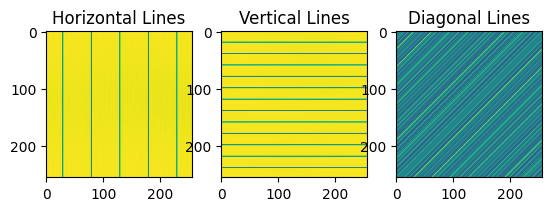

In [11]:
# Inverse DFT to get the filtered images
filtered_horizontal_img = cv2.idft(filtered_horizontal_shift)
filtered_vertical_img = cv2.idft(filtered_vertical_shift)
filtered_diagonal_img = cv2.idft(filtered_diagonal_shift)

magnitude_horizontal = cv2.magnitude(filtered_horizontal_img[:, :, 0], filtered_horizontal_img[:, :, 1])
magnitude_horizontal = cv2.normalize(magnitude_horizontal, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

magnitude_vertical = cv2.magnitude(filtered_vertical_img[:, :, 0], filtered_vertical_img[:, :, 1])
magnitude_vertical = cv2.normalize(magnitude_vertical, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

magnitude_diagonal = cv2.magnitude(filtered_diagonal_img[:, :, 0], filtered_diagonal_img[:, :, 1])
magnitude_diagonal = cv2.normalize(magnitude_diagonal, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the filtered images
plt.subplot(131), plt.imshow(magnitude_horizontal), plt.title('Horizontal Lines')
plt.subplot(132), plt.imshow(magnitude_vertical), plt.title('Vertical Lines')
plt.subplot(133), plt.imshow(magnitude_diagonal), plt.title('Diagonal Lines')

plt.show()

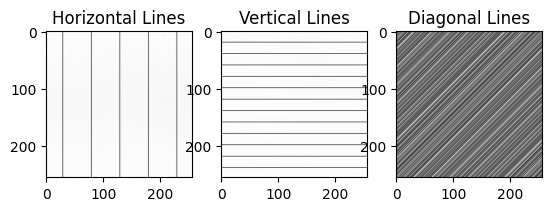

In [10]:
plt.subplot(131), plt.imshow(magnitude_horizontal, cmap='gray'), plt.title('Horizontal Lines')
plt.subplot(132), plt.imshow(magnitude_vertical, cmap='gray'), plt.title('Vertical Lines')
plt.subplot(133), plt.imshow(magnitude_diagonal, cmap='gray'), plt.title('Diagonal Lines')
plt.show()